In [3]:
import numpy as np

from chainer_cv.datasets import VOCDetectionDataset
from chainer_cv.wrappers import ResizeWrapper
from chainer_cv.wrappers import RandomMirrorWrapper
from chainer_cv.wrappers import output_shape_hard_max_soft_min
from chainer_cv.wrappers import bbox_resize_hook
from chainer_cv.wrappers import bbox_mirror_hook

test_data = VOCDetectionDataset(mode='val')

[[ 208.98876953   45.50561523  579.77526855  544.38201904    3.        ]]


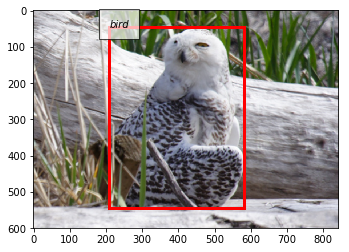

[[ 261.22473145   45.50561523  632.01123047  544.38201904    3.        ]]


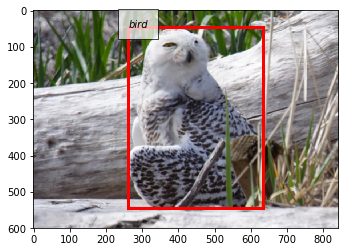

[[ 208.98876953   45.50561523  579.77526855  544.38201904    3.        ]]


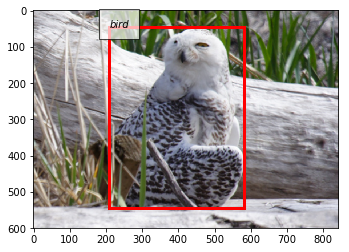

[[ 683.20001221  193.6000061   744.          337.6000061    15.        ]
 [ 433.6000061   124.80000305  798.40002441  374.3999939    19.        ]]


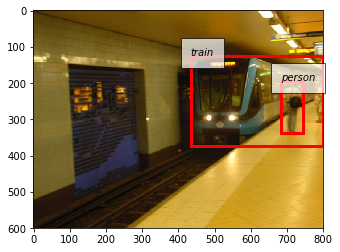

[[ 683.20001221  193.6000061   744.          337.6000061    15.        ]
 [ 433.6000061   124.80000305  798.40002441  374.3999939    19.        ]]


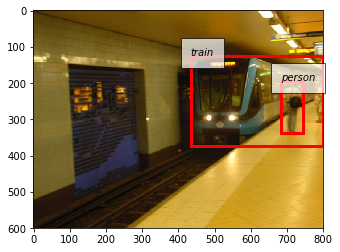

[[  55.          193.6000061   115.79998779  337.6000061    15.        ]
 [   0.59997559  124.80000305  365.3999939   374.3999939    19.        ]]


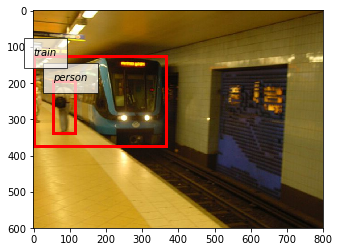

[[ 235.20001221  129.6000061   473.6000061   363.20001221   20.        ]]


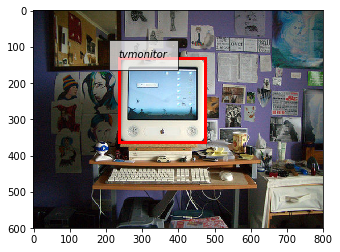

[[ 235.20001221  129.6000061   473.6000061   363.20001221   20.        ]]


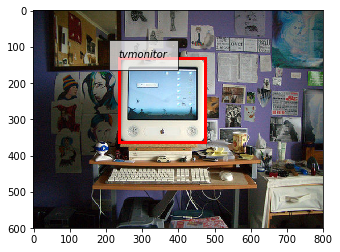

[[ 235.19999695  129.6000061   473.6000061   363.20001221   20.        ]]


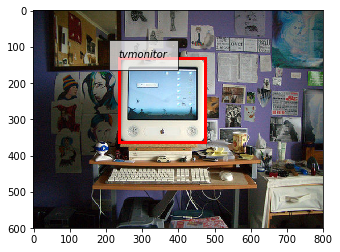

In [5]:
wrappers = [
    lambda d: ResizeWrapper(
        d, preprocess_idx=0,
        output_shape=output_shape_hard_max_soft_min(600, 1200), 
        hook=bbox_resize_hook(1)),
    lambda d: RandomMirrorWrapper(
        d, augment_idx=0, orientation='h', hook=bbox_mirror_hook())
]

for wrapper in wrappers:
    #train_data = wrapper(train_data)
    test_data = wrapper(test_data)

for k in range(30, 33):
    for i in range(3):
        img, bboxes = test_data.get_example(k)
        img = img.transpose(1, 2, 0)
        img = img[:, :, ::-1].astype(np.uint8)
        print bboxes

        from chainer_cv.visualizations import vis_img_bbox
        import matplotlib.pyplot as plt
        # plt.imshow(img)
        # plt.show()
        vis_img_bbox(img, bboxes, test_data.labels)
        plt.show()